In [1]:
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
import mediapipe as mp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools

In [2]:
PTH = 'images/cropped_new_dataset/'

In [572]:
train_path = f'{PTH}/train'  

test_path = f'{PTH}/test'

In [573]:
#os.listdir(train_path)
os.listdir(PTH)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [574]:
def euc2d(a, b):
    return np.sqrt( (a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]) )

In [575]:
def euc3d(a, b):
    return np.sqrt( (a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]) + (a[2]-b[2])*(a[2]-b[2]) )

In [576]:
df = pd.DataFrame({
#         'V1': [], 'V2': [], 'V3': [], 'V4': [], 'V5': [], 'V6': [], 'V7': [], 'V8': [], 'V9': [], 'V10': [], 'V11': [], 'V12': [], 
#         'V13': [], 'V14': [], 'V15': [],'V16': [], 'V17': [], 'V18': [], 'V19': [], 'V20': [], 'V21': [], 'V22': [],
#          'V23': [],  'V24': [], 'y': []
    }, columns = [f"{i}-{j}" for i in range(39) for j in range(39)] + ["y"])
#

In [577]:
len(df)

0

# Detection

In [578]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [579]:
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

In [580]:
np.append(np.array([1,2,3]), np.array([4,5,6]))

array([1, 2, 3, 4, 5, 6])

In [581]:
LEFT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LEFT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYEBROW)))
RIGHT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYEBROW)))
LIPS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))
CONTOURS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_CONTOURS)))
OTHER = [1] #0, 1, 6, 8, 10

In [582]:
def prepare_csv(path, mode, img_shape, predictor, face_mesh):
    
    emotions = os.listdir(path)
    
    df = pd.DataFrame({
#         'V1': [], 'V2': [], 'V3': [], 'V4': [], 'V5': [], 'V6': [], 'V7': [], 'V8': [], 'V9': [], 'V10': [], 'V11': [], 'V12': [], 
#         'V13': [], 'V14': [], 'V15': [],'V16': [], 'V17': [], 'V18': [], 'V19': [], 'V20': [], 'V21': [], 'V22': [],
#          'V23': [],  'V24': [], 'y': []
    }, columns = [f"{i}" for i in range(92 * 2)] + ["y"])
    
    
    for i, emotion in enumerate(emotions):
        images = os.listdir(f'{path}/{emotion}')
        for image in images:
            img = cv2.imread(f"{path}/{emotion}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img, (img_shape, img_shape))
            img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
            
            #landmarks = predictor(img, dlib.rectangle(0, 0, img_shape, img_shape))
            
#             shape = face_utils.shape_to_np(landmarks)
#             shape = shape[[36, 37, 38, 39, 40, 41] + [42, 43, 44, 45, 46, 47] + [17, 19, 21] + [22, 24, 26] + [30, 31, 35] + [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 67, 62, 63, 65, 66]]
            
            results = face_mesh.process(img)
        
            if results.multi_face_landmarks:
        
                shape = [(lmk.x, lmk.y, lmk.z) for lmk in results.multi_face_landmarks[0].landmark]
                shape = np.array(shape)
#                 nose = shape[1]
#                 shape = shape[LEFT_EYE + RIGHT_EYE + LEFT_EYEBROW + RIGHT_EYEBROW + LIPS]

                #distances2d = distance.cdist(shape[1], shape, 'euclidean')

                distances2d = [round(euc2d(nose, x), 6) for x in shape]
                distances3d = [round(euc3d(nose, x), 6) for x in shape]

                #df.append(pd.DataFrame([np.append(distances.flatten(), i)], columns=columns))
                
                #print(len(distances2d + distances3d))

                df.loc[len(df)] = distances2d + distances3d + [i] #np.append(distances.flatten(), i)
            
#             V1 = (euc(shape[1],shape[5]) + euc(shape[2],shape[4])) / 2
#             V2 = euc(shape[0], shape[3])
#             V3 = (euc(shape[7],shape[11]) + euc(shape[8],shape[10])) / 2
#             V4 = euc(shape[6], shape[9])
#             V5 = euc(shape[12], shape[14])
#             V6 = euc(shape[15], shape[17])
#             V7 = euc(shape[19], shape[25])
#             V8 = (euc(shape[1],shape[13]) + euc(shape[2],shape[13])) / 2
#             V9 = (euc(shape[7],shape[16]) + euc(shape[8],shape[16])) / 2
#             V10 = euc(shape[18], shape[22])
#             V11 = (euc(shape[5],shape[19]) + euc(shape[4],shape[19])) / 2
#             V12 = (euc(shape[11],shape[25]) + euc(shape[10],shape[25])) / 2
#             V13 = euc(shape[3], shape[14])
#             V14 = euc(shape[6], shape[15])
#             V15 = euc(shape[20], shape[30])
#             V16 = euc(shape[21], shape[29])
#             V17 = euc(shape[22], shape[28])
#             V18 = euc(shape[23], shape[27])
#             V19 = euc(shape[24], shape[26])
#             V20 = euc(shape[19], shape[18])
#             V21 = euc(shape[25], shape[18])
#             V22 = (euc(shape[33],shape[34]) + euc(shape[35],shape[38]) + euc(shape[36],shape[37])) / 3
#             V23 = euc(shape[3],shape[19])
#             V24 = euc(shape[6],shape[20])
            
#             df.loc[len(df.index)] = [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, i]
#             df.loc[len(df.index)-1] = round(df.loc[len(df.index)-1], 2)
            
    df.to_csv(f'csv/MediaPipe/dataset-{mode}.csv', index=False)

In [583]:
img_shape = 48

In [584]:
#detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [585]:
prepare_csv(PTH, 'cropped-fer23', img_shape, predictor, face_mesh)

In [456]:
#prepare_csv(train_path, 'train', img_shape, predictor, face_mesh)

In [457]:
#prepare_csv(test_path, 'test', img_shape, predictor, face_mesh)

In [93]:
def prepare_csv3(path, mode, img_shape, face_mesh):
    
    emotions = os.listdir(path)
    
    columns = [f"{i}" for i in range(228484)] + ["y"]
    
    df = pd.DataFrame({
#         'V1': [], 'V2': [], 'V3': [], 'V4': [], 'V5': [], 'V6': [], 'V7': [], 'V8': [], 'V9': [], 'V10': [], 'V11': [], 'V12': [], 
#         'V13': [], 'V14': [], 'V15': [],'V16': [], 'V17': [], 'V18': [], 'V19': [], 'V20': [], 'V21': [], 'V22': [],
#          'V23': [],  'V24': [], 'y': []
    }, columns = columns)
    
    
    for i, emotion in enumerate(emotions):
        images = os.listdir(f'{path}/{emotion}')
        for image in images:
            img = cv2.imread(f"{path}/{emotion}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img, (img_shape, img_shape))
            img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
            
            #landmarks = predictor(img, dlib.rectangle(0, 0, img_shape, img_shape))
            
#             shape = face_utils.shape_to_np(landmarks)
#             shape = shape[[36, 37, 38, 39, 40, 41] + [42, 43, 44, 45, 46, 47] + [17, 19, 21] + [22, 24, 26] + [30, 31, 35] + [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 67, 62, 63, 65, 66]]
            
            results = face_mesh.process(img)
        
            if results.multi_face_landmarks:
        
                shape = [(lmk.x, lmk.y, lmk.z) for lmk in results.multi_face_landmarks[0].landmark]
                shape = np.array(shape)
#                 nose = shape[1]
#                 shape = shape[LEFT_EYE + RIGHT_EYE + LEFT_EYEBROW + RIGHT_EYEBROW + LIPS]

                distances = distance.cdist(shape, shape, 'euclidean')
    
                #print(len(distances.flatten()))

#                 distances2d = [round(euc2d(nose, x), 6) for x in shape]
#                 distances3d = [round(euc3d(nose, x), 6) for x in shape]
                
                df = pd.concat([df, pd.DataFrame([np.append(distances.flatten(), i)], columns=columns)], ignore_index=True)
                
                #print(len(distances2d + distances3d))

                #df.loc[len(df)] = distances2d + distances3d + [i] #np.append(distances.flatten(), i)

                df.loc[len(df.index)-1] = round(df.loc[len(df.index)-1], 4)
            
    df.to_csv(f'csv/MediaPipe/dataset-{mode}.csv', index=False)

In [94]:
prepare_csv3(PTH, 'cropped-fer23-2', img_shape, face_mesh)

KeyboardInterrupt: 

# New cropped FER-23 faces

In [540]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection()

In [568]:
def prepare_csv1(path, mode, img_shape, predictor, face_mesh):
    
    emotions = os.listdir(path)
    
    
    for i, emotion in enumerate(emotions):
        images = os.listdir(f'{path}/{emotion}')
        for image in images:
            img = cv2.imread(f"{path}/{emotion}/{image}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img, (img_shape, img_shape))
            #img = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
            
            #landmarks = predictor(img, dlib.rectangle(0, 0, img_shape, img_shape))
            
#             shape = face_utils.shape_to_np(landmarks)
#             shape = shape[[36, 37, 38, 39, 40, 41] + [42, 43, 44, 45, 46, 47] + [17, 19, 21] + [22, 24, 26] + [30, 31, 35] + [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 67, 62, 63, 65, 66]]
            
    
            results = face_mesh.process(img)
        
            if(not results.detections):
                continue
        
            for detection in results.detections:
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = img.shape
                x, y, w, h = max(0, int(bbox.xmin * w)), max(0, int(bbox.ymin * h)), max(0, int(bbox.width * w)), max(0, int(bbox.height * h))
                
                new_img = img[y:y+h, x:x+w]
                
                new_img = cv2.resize(new_img, (img_shape, img_shape))
                new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
                cv2.imwrite(f"images/cropped_new_dataset/{emotion}/{image}", new_img)

In [569]:
prepare_csv1('images/new_dataset/', 'new_dataset', 48, predictor, face_detection)

In [535]:
img = cv2.imread("images/new_dataset/anger/image0000963.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

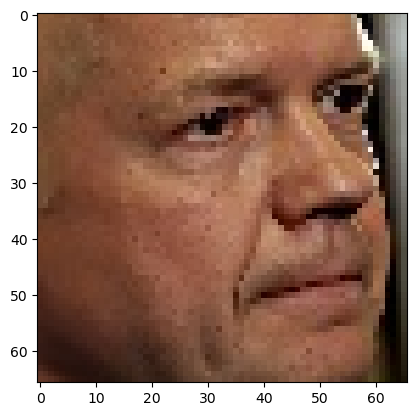

In [539]:
results = face_detection.process(img)
        
for detection in results.detections:
    bbox = detection.location_data.relative_bounding_box
    h, w, _ = img.shape
    x, y, w, h = max(0, int(bbox.xmin * w)), max(0, int(bbox.ymin * h)), max(0, int(bbox.width * w)), max(0, int(bbox.height * h))

    new_img = img[y:y+h, x:x+w]
    
    plt.imshow(new_img)

# Read DF

In [3]:
df = pd.read_csv('csv/MediaPipe/train_nose_184.csv')
#test_df = pd.read_csv('csv/MediaPipe/dataset-test.csv')

In [4]:
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V175,V176,V177,V178,V179,V180,V181,V182,V183,y
0,-0.297426,-0.473132,-0.650654,-0.849423,-0.996441,-1.067820,-1.156753,-0.100666,-0.170887,-1.089498,...,0.347779,0.460423,0.564430,0.247298,0.024115,0.050741,0.146586,0.025320,0.118462,0.0
1,-0.376166,-0.346421,-0.302813,-0.230802,-0.156279,-0.012831,-0.047162,-0.368209,-0.370542,-0.099004,...,0.375510,0.366770,0.380406,0.184203,0.324787,0.366871,0.291419,0.377346,0.446578,0.0
2,-0.211765,-0.378358,-0.543208,-0.721045,-0.848202,-0.891288,-0.972356,0.018882,-0.076024,-0.927402,...,-0.581318,-0.561493,-0.541889,-0.838319,-0.860101,-0.761671,-0.756214,-0.759488,-0.585651,0.0
3,-1.666382,-1.610004,-1.549013,-1.474557,-1.404201,-1.306937,-1.306823,-1.708192,-1.693661,-1.350910,...,-1.098112,-1.169724,-1.140300,-0.307483,-0.946832,-0.953239,-0.573587,-0.936231,-0.595380,0.0
4,0.337538,0.231630,0.233884,0.314808,0.399223,0.492313,0.509209,0.551466,0.482724,0.460351,...,-0.446302,-0.359649,-0.246551,-0.183265,-0.616226,-0.627338,-0.382590,-0.586211,-0.511034,0.0


In [4]:
target = df['y']
df.drop('y', axis = 1, inplace=True)

In [5]:
# target_test = test_df['y']
# test_df.drop('y', axis = 1, inplace=True)

In [6]:
train_img, test_img, train_lbl, test_lbl = train_test_split(df, target, test_size=1/7.0, random_state=0)

In [7]:
#train_img == train_img1

In [8]:
#train_img1

In [9]:
#train_img.columns = [f'V{i}' for i in range(184)]

In [10]:
#train_img

In [11]:
train_img.head(3)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
2051,0.366012,0.390903,0.409863,0.425622,0.433002,0.399406,0.440449,0.326382,0.340810,0.436648,...,0.302267,0.252976,0.231471,0.215860,0.313248,0.266797,0.281883,0.311081,0.294225,0.327053
6611,0.334748,0.361064,0.383388,0.405425,0.418991,0.393014,0.434922,0.298148,0.311098,0.427300,...,0.284489,0.247191,0.230898,0.219568,0.280286,0.240731,0.257830,0.278851,0.271664,0.297184
3721,0.350193,0.377576,0.399409,0.417785,0.426795,0.395752,0.435751,0.309350,0.323895,0.431572,...,0.313380,0.264766,0.243784,0.229698,0.306035,0.238825,0.272286,0.309734,0.294623,0.329186


In [12]:
scaler = StandardScaler().fit(train_img) # df

In [13]:
# import pickle as pk

# with open('vars/MediaPipe/scaler-train-dataset-cropped-184.pkl', 'wb') as f:
#     pk.dump(scaler, f)

In [49]:
# with open('vars/MediaPipe/standard955nose.pkl', 'rb') as f:
#     sc = pk.load(f)

In [50]:
# sum(sc.var_ != scaler.var_)

In [212]:
#sum(sc.mean_ != scaler.mean_)

In [14]:
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [15]:
#check_df = pd.read_csv('csv/MediaPipe/train_nose_955_standard.csv')

In [16]:
#check_df.drop('y', axis = 1, inplace=True)

In [17]:
#new_scaler = StandardScaler()

In [18]:
#new_scaler.fit(check_df)

In [19]:
#check_df

In [20]:
#new_scaler.inverse_transform(check_df)

In [21]:
#train_img = new_scaler.transform(train_img)

In [22]:
#check_df == train_img

In [23]:
#train_img

In [24]:
#new_scaler.mean_

In [25]:
#scaler.mean_

In [26]:
#train_img

In [27]:
#train_img = new_scaler.transform(train_img)

In [28]:
#train_img

In [29]:
#check_df

In [31]:
train_df = pd.DataFrame(train_img, columns = [f"V{i}" for i in range(len(train_img[0]))])

test_df = pd.DataFrame(test_img, columns = [f"V{i}" for i in range(len(train_img[0]))])

y_train_df = pd.DataFrame(train_lbl, columns = ['y'])
y_train_df = y_train_df.reset_index().drop('index', axis=1)

y_test_df = pd.DataFrame(test_lbl, columns = ['y'])
y_test_df = y_test_df.reset_index().drop('index', axis=1)

In [32]:
train_df['y'] = y_train_df
test_df['y'] = y_test_df

In [33]:
# train_df.to_csv(f'csv/MediaPipe/train_nose_184_cropped_8emotion.csv', index=False)
# test_df.to_csv(f'csv/MediaPipe/test_nose_184_cropped_8emotion.csv', index=False)

# Example

In [177]:
#img = dlib.load_rgb_image("C:/Users/Nur/Pictures/iuTCVXZ88N.jpg")
img = dlib.load_rgb_image("dataset/train/happy/im1019.png")
img = dlib.resize_image(img, img_shape, img_shape)

In [179]:
#rect = detector(img, 0)

In [180]:
#rect

In [181]:
#landmarks = predictor(img, rect[0])
landmarks = predictor(img, dlib.rectangle(0,0,img_shape,img_shape))

In [182]:
shape = face_utils.shape_to_np(landmarks)

In [183]:
#shape

In [184]:
#win.add_overlay(rect)

In [185]:
#win.add_overlay(landmarks)

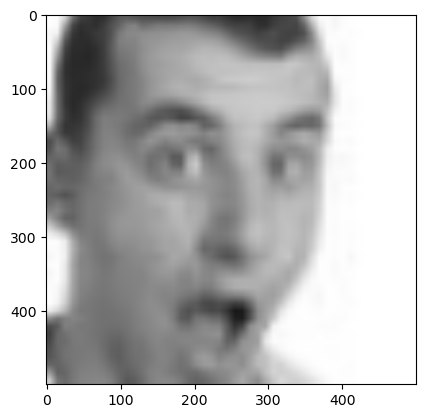

In [50]:
img1 = cv2.imread("images/dataset/test/surprised/im5.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (500,500))
#img1 = cv2.GaussianBlur(img1, (3, 3), cv2.BORDER_DEFAULT)
#img1 = cv2.equalizeHist(img1)


plt.imshow(img1)

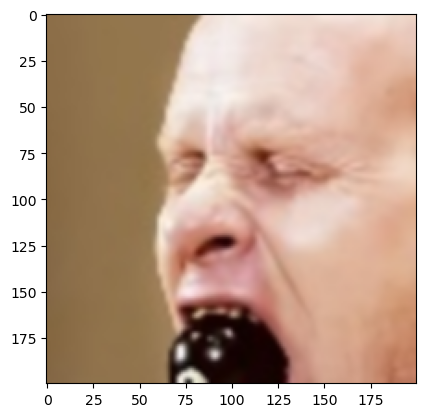

In [549]:
img1 = cv2.imread("images/new_dataset/anger/image0001341.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (200, 200))
img1 = cv2.GaussianBlur(img1, (3, 3), cv2.BORDER_DEFAULT)
#img1 = cv2.equalizeHist(img1)


plt.imshow(img1, cmap='gray')

In [51]:
import itertools

In [52]:
img_shape = img1.shape[0]

In [53]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [54]:
LEFT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LEFT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYEBROW)))
RIGHT_EYEBROW = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYEBROW)))
LIPS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))
CONTOURS = list(set(itertools.chain(*mp_face_mesh.FACEMESH_CONTOURS)))
OTHER = [1] #0, 1, 6, 8, 10

face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

    
results = face_mesh.process(img1)
annotated_image = img1.copy()

#landmarks = np.array([(lmk.landmark.x, lmk.landmark.y) for lmk in results.multi_face_landmarks])
#print(landmarks)

#[cv2.circle(annotated_image, (int(lmk.x * img_shape), int(lmk.y * img_shape)), 1, (0, 0, 255)) for lmk in results.multi_face_landmarks[0].landmark]
shape = [(lmk.x, lmk.y, lmk.z) for i, lmk in enumerate(results.multi_face_landmarks[0].landmark)]
shape = np.array(shape)
#nose = shape[1]
#shape = shape[LEFT_EYE + RIGHT_EYE + LEFT_EYEBROW + RIGHT_EYEBROW + LIPS + OTHER] # 
#print(shape)
#cv2.circle(annotated_image, (int(nose[0] * img_shape), int(nose[1] * img_shape)), 2, (0, 0, 255))
#[cv2.putText(annotated_image, f'{i}', (lmk[0], lmk[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 0, 0), 1, cv2.LINE_AA) for i, lmk in enumerate(shape)]
#[cv2.circle(annotated_image, (int(lmk[0] * img_shape), int(lmk[1] * img_shape)), 2, (0, 0, 255)) for lmk in shape]

# for face_landmarks in results.multi_face_landmarks:
#         mp_drawing.draw_landmarks(
#               image=annotated_image,
#               landmark_list=face_landmarks,
#               connections=mp_face_mesh.FACEMESH_TESSELATION,
#               landmark_drawing_spec=None,
#               connection_drawing_spec=mp_drawing_styles
#               .get_default_face_mesh_tesselation_style())

#     mp_drawing.draw_landmarks(
#       image=annotated_image,
#       landmark_list=face_landmarks,
#       connections=mp_face_mesh.FACEMESH_CONTOURS,
#       landmark_drawing_spec=None,
#       connection_drawing_spec=mp_drawing_styles
#       .get_default_face_mesh_contours_style())

#         mp_drawing.draw_landmarks(
#           image=annotated_image,
#           landmark_list=face_landmarks,
#           connections=mp_face_mesh.FACEMESH_IRISES,
#           landmark_drawing_spec=None,
#           connection_drawing_spec=mp_drawing_styles
#           .get_default_face_mesh_iris_connections_style())

In [55]:
#shape = np.array(shape)

In [56]:
#shape = shape[[47, 46, 20, 21]+[17, 18, 19, 20, 21]+[43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]+[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]]

In [57]:
len(shape)

478

In [42]:
#[euc2d(shape[1], x) for x in shape] + [euc3d(shape[1], x) for x in shape]

In [43]:
#[euc3d(shape[1], x) for x in shape]

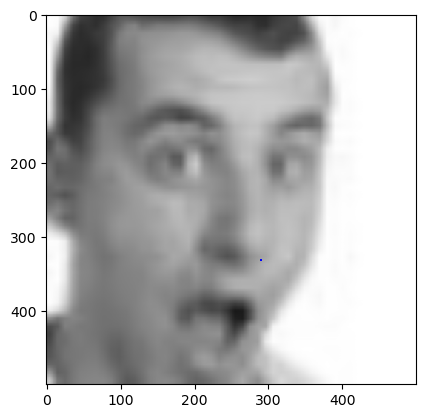

In [44]:
#plt.figure(figsize = (100,100))
plt.imshow(annotated_image, interpolation='nearest')

In [283]:
[(lmk.x * img_shape, lmk.y * img_shape, lmk.z) for lmk in results.multi_face_landmarks[0].landmark]

[(258.22460651397705, 361.3562881946564, -0.06026965752243996),
 (278.0754864215851, 325.274258852005, -0.13350912928581238),
 (268.98834109306335, 335.6305956840515, -0.06495456397533417),
 (261.85673475265503, 281.0160517692566, -0.11592601984739304),
 (279.14702892303467, 312.36377358436584, -0.1443966031074524),
 (276.79431438446045, 294.4980561733246, -0.1373957395553589),
 (267.41546392440796, 249.61528182029724, -0.0803973525762558),
 (161.28072142601013, 239.81650173664093, -0.03671324625611305),
 (265.45268297195435, 219.43865716457367, -0.07124964147806168),
 (266.35345816612244, 202.5378942489624, -0.08060156553983688),
 (262.55184412002563, 130.61457872390747, -0.06558729708194733),
 (258.21179151535034, 365.89497327804565, -0.05611027777194977),
 (257.76439905166626, 370.116651058197, -0.04693204164505005),
 (257.1932077407837, 372.8537857532501, -0.03274215757846832),
 (256.91401958465576, 375.7460117340088, -0.029204273596405983),
 (257.4116885662079, 383.3320438861847, 

In [ ]:
[(lmk.x, lmk.y, lmk.z) for lmk in results.multi_face_landmarks[0].landmark]

In [360]:
temp_x = [lmk[1] for lmk in shape] #results.multi_face_landmarks[0].landmark

In [361]:
temp_y = [lmk[2] for lmk in shape] #results.multi_face_landmarks[0].landmark

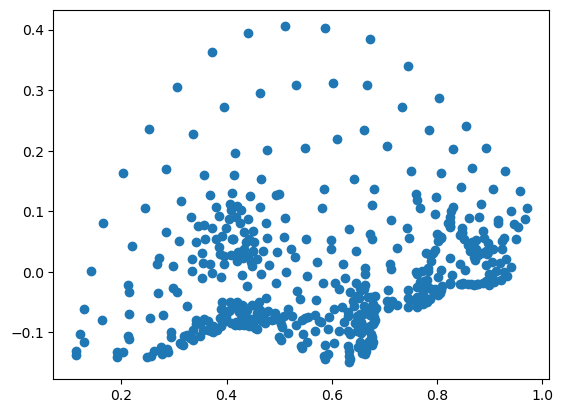

In [339]:
plt.scatter(temp_x, temp_y)

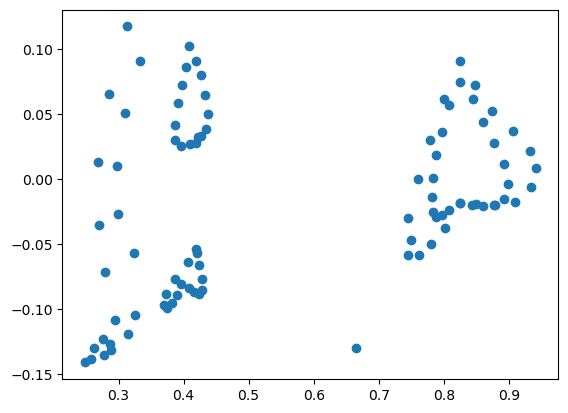

In [362]:
plt.scatter(temp_x, temp_y)

# DLib

In [48]:
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [49]:
landmarks = predictor(img1, dlib.rectangle(0,0,200,200))

In [50]:
shape = face_utils.shape_to_np(landmarks)
shape = shape[[36, 37, 38, 39, 40, 41] + [42, 43, 44, 45, 46, 47] + [17, 19, 21] + [22, 24, 26] + [30, 31, 35] + [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 67, 62, 63, 65, 66]]

In [51]:
len(shape)

39

In [52]:
from scipy.spatial import distance

distances = distance.cdist(shape, shape, 'euclidean')
print(np.append(distances.flatten(), 2))
# columns = [f"{i}-{j}" for i in range(len(shape)) for j in range(len(shape))]

# pd.DataFrame([distances.flatten()], columns=columns)

[ 0.          8.48528137 17.88854382 ...  9.21954446  0.
  2.        ]


In [53]:
for i, (x, y) in enumerate(shape):
    cv2.circle(img1, (x, y), 1, (255, 0, 0))
    cv2.putText(img1, f'{i}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 0, 0), 1, cv2.LINE_AA)

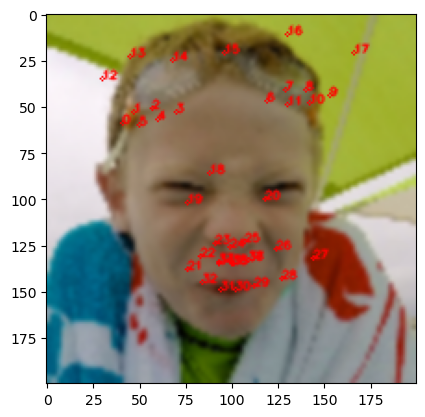

In [54]:
plt.imshow(img1, cmap='gray')

In [278]:
(euc(shape[1],shape[5]) + euc(shape[2],shape[4])) / 2

9.626712082661493

In [275]:
euc(shape[2],shape[4])

9.055385138137417

In [279]:
V1 = (euc(shape[1],shape[5]) + euc(shape[2],shape[4])) / 2
V2 = euc(shape[0], shape[3])
V3 = (euc(shape[7],shape[11]) + euc(shape[8],shape[10])) / 2
V4 = euc(shape[6], shape[9])
V5 = euc(shape[12], shape[14])
V6 = euc(shape[15], shape[17])
V7 = euc(shape[19], shape[25])
V8 = (euc(shape[1],shape[13]) + euc(shape[2],shape[13])) / 2
V9 = (euc(shape[7],shape[16]) + euc(shape[8],shape[16])) / 2
V10 = euc(shape[18], shape[22])
V11 = (euc(shape[5],shape[19]) + euc(shape[4],shape[19])) / 2
V12 = (euc(shape[11],shape[25]) + euc(shape[10],shape[25])) / 2
V13 = euc(shape[3], shape[14])
V14 = euc(shape[6], shape[15])
V15 = euc(shape[20], shape[30])
V16 = euc(shape[21], shape[29])
V17 = euc(shape[22], shape[28])
V18 = euc(shape[23], shape[27])
V19 = euc(shape[24], shape[26])
V20 = euc(shape[19], shape[18])
V21 = euc(shape[25], shape[18])
V22 = (euc(shape[33],shape[34]) + euc(shape[35],shape[38]) + euc(shape[36],shape[37])) / 3
V23 = euc(shape[3],shape[19])
V24 = euc(shape[6],shape[20])

In [280]:
print(V1,
V2,
V3,
V4,
V5,
V6,
V7,
V8,
V9,
V10,
V11,
V12)

9.626712082661493 31.144823004794873 9.634710039206889 31.064449134018133 55.226805085936306 58.215118311311535 77.0 28.972335411114017 27.992935895029383 23.0 67.27549365068023 66.24563752172332
